In [1]:
#!/usr/bin/env Python
# coding=utf-8

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
datasets = {"agnews": 1 , "mnli": 0, "yahoo": 5, "yelp-full": 0} # 
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 0.001, "yelp-full": 0.001, "mnli": 100}
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}
fig_path = "/Users/cdq/Desktop/opensource/FedPrompt/figs/ablation/filter"

filenames = [
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.05.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_-1.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.05.log",
    "random_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log"
]

labels = ["filter 0.1", "filter 0.01", "filter 0.2", "filter 0.5", "filter 0.05", "filter 1", "no filter", "random filter 0.1", "random filter 0.001", "random filter 0.2", "random filter 0.5", "random filter 0.05", "random filter 1"]

seed = 42

#

In [3]:
colors=['r','g','b','y','m','k', 'c','r','g','b','y', 'm','k']# 'm','k'
linestyle=['-','-','-','-','-','-','-','--','--','--','--','--','--']
linewidths = [0,0,0,0,0,0,0,1.5,1.5,1.5,1.5,1.5,1.5]

/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log
max accuracy is 0.8896052631578948, round is 23
['filter 0.1', 'filter 0.01', 'filter 0.2', 'filter 0.5', 'filter 0.05', 'filter 1', 'no filter', 'random filter 0.1', 'random filter 0.001', 'random filter 0.2', 'random filter 0.5', 'random filter 0.05', 'random filter 1'] 0
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/

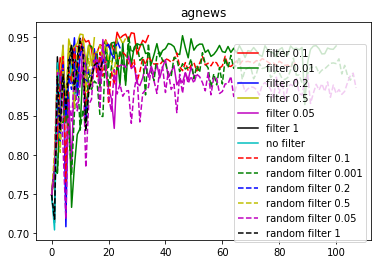

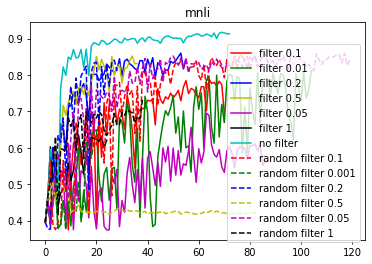

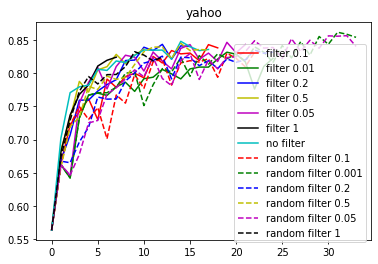

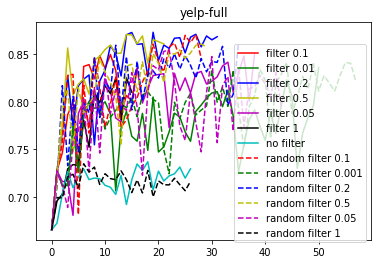

In [4]:
#!/usr/bin/env Python
# coding=utf-8

# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:

    root_path = f"/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase = 'aggregated model performance is'
        print(log_path)
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
            continue

        # print(filename)
        # print(df)
        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(labels, filenames.index(filename))
        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linestyle=linestyle[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    plt.savefig(os.path.join(fig_path, f"round-{dataset}.pdf"))
    i = i+1

/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log
max accuracy is 0.8896052631578948, runtime is 11679.5
35 35
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log
max accuracy is 0.8855263157894737, runtime is 3276.0
102 101
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log
max accuracy is 0.8830263157894737, runtime is 5955.0
25 25
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large

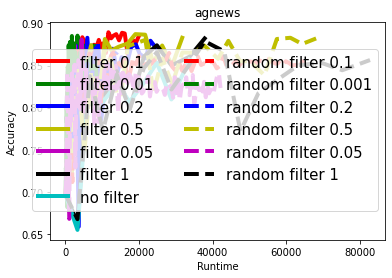

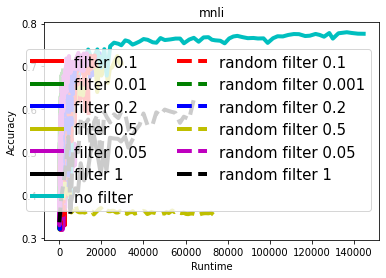

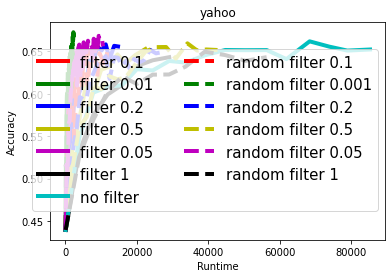

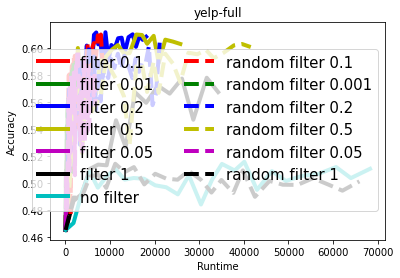

In [5]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
for dataset in datasets:

    root_path = f"/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-11.19/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"
    
    fig = plt.figure()
    plt.title(dataset)
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    for filename in filenames:

        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample, no comm. because bit fit is parameter efficient.
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                
                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        runtime_list[dataset].append(runtime[idx])
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],y_mean,label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4,linestyle=linestyle[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    plt.savefig(os.path.join(fig_path, f"runtime-{dataset}.pdf"))
    t = t+1

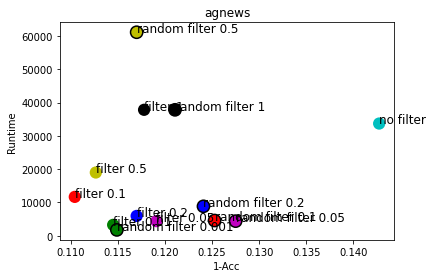

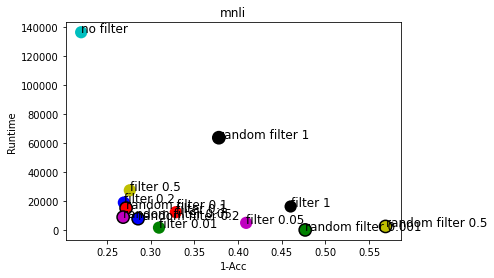

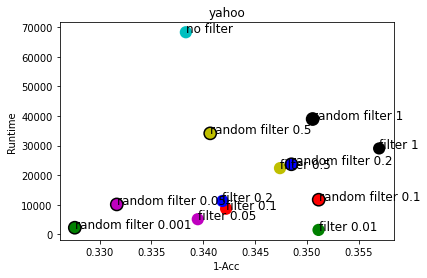

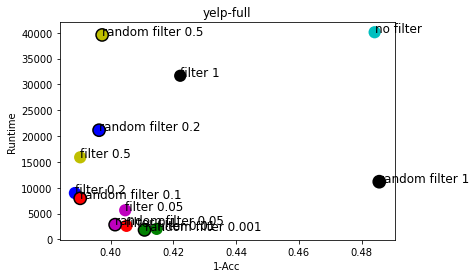

In [6]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=colors[:len(acc_list[dataset])],edgecolors='k',linewidths=linewidths[:len(acc_list[dataset])])
    for idx in range(len(acc_list[dataset])):
        plt.text(1-acc_list[dataset][idx], runtime_list[dataset][idx], labels[idx], fontsize=12)

    plt.savefig(os.path.join(fig_path, f"sactter-{dataset}.pdf"))
    c=c+1

In [7]:
labels

['filter 0.1',
 'filter 0.01',
 'filter 0.2',
 'filter 0.5',
 'filter 0.05',
 'filter 1',
 'no filter',
 'random filter 0.1',
 'random filter 0.001',
 'random filter 0.2',
 'random filter 0.5',
 'random filter 0.05',
 'random filter 1']

In [8]:
# rerun mnli
acc_list["mnli"] = [0.7282730514518594,
 0.6905756495160469,
 0.7308201732042792,
 0.7239938869077942,
 0.7316352521650535,
 0.5397860417727968,
 0.7797249108507387,
 0.6713194090677534,
 0.5230769230769231,
 0.7145185939887927,
 0.43107488537952116,
 0.6220071319409067, 
 0.590728476821192]
runtime_list['mnli'] = [15296.0,
 1825.0,
 19145.0,
 27571.5,
 5122.0,
 16408.0,
 136580.5,
 12470.0,
 244.0,
 7978.0,
 2646.5,
 9058.0,
 63846.5]

In [9]:
runtime_list['mnli']

[15296.0,
 1825.0,
 19145.0,
 27571.5,
 5122.0,
 16408.0,
 136580.5,
 12470.0,
 244.0,
 7978.0,
 2646.5,
 9058.0,
 63846.5]

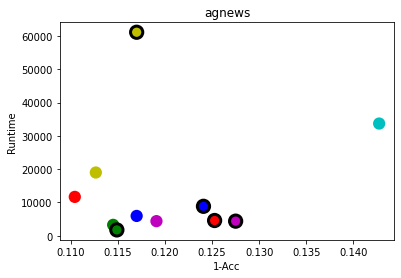

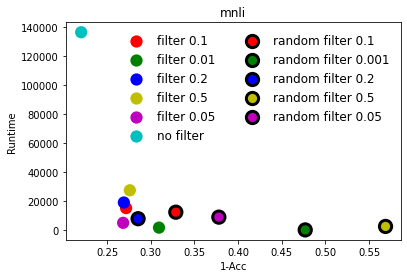

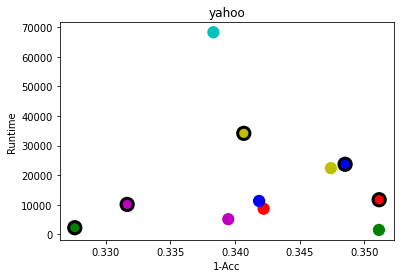

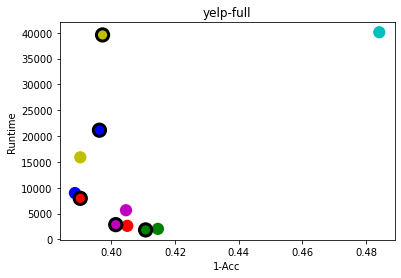

In [10]:
c=0
show_index = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11] # dig out filter 1
colors_tailored = [colors[i] for i in show_index]
linewidths_tailored = np.array([linewidths[i] for i in show_index])*2
labels_tailored = [labels[i] for i in show_index]

for dataset in datasets:
    acc_list_tailored = [acc_list[dataset][i] for i in show_index]
    runtime_list_tailored = [runtime_list[dataset][i] for i in show_index]
    
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")

    plt.scatter(1- np.array(acc_list_tailored), np.array(runtime_list_tailored ),s=150,color=colors_tailored[:len(acc_list[dataset])],edgecolors='k',linewidths=linewidths_tailored[:len(acc_list[dataset])])
    for i in range(5):
         plt.scatter(0,0,s=150,color=colors_tailored[i],edgecolors='k',linewidths=linewidths_tailored[i],label = labels_tailored[i])
    
    plt.scatter(0,0,s=150,color=colors_tailored[5],edgecolors='k',linewidths=linewidths_tailored[5],label = labels_tailored[5])
    
    for i in range(6,11):
        plt.scatter(0,0,s=150,color=colors_tailored[i],edgecolors='k',linewidths=linewidths_tailored[i],label = labels_tailored[i])
    # plt.text(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]))
    if dataset == "mnli":
         plt.legend(loc="lower right",bbox_to_anchor=(1,0.4),ncol=2,fontsize=12,frameon=False)
    plt.savefig(os.path.join(fig_path, f"sactter-{dataset}.pdf"))
    c=c+1

In [11]:
labels_tailored

['filter 0.1',
 'filter 0.01',
 'filter 0.2',
 'filter 0.5',
 'filter 0.05',
 'no filter',
 'random filter 0.1',
 'random filter 0.001',
 'random filter 0.2',
 'random filter 0.5',
 'random filter 0.05']